# AppMdl

* A complex App with 16 functions.
* There are 2 branches, 2 parallels, 2 cycles, and 2 self-loops in App16

In [115]:
import os
import logging
from io import BytesIO
import time
import zipfile
import numpy as np
import boto3
from datetime import datetime, timezone
from time import gmtime, strftime
import json
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
import pickle
import math

In [2]:
client = boto3.client('lambda')

In [117]:
function_prefix='AppMdl'

In [118]:
function_count = 16

In [119]:
# The difference between UTC and local timezone
timezone_offset = 0

## Create Functions of AppMdl

### Function Name List

In [120]:
function_name_list = [function_prefix+'_f'+str(i) for i in range(1, function_count+1)]
print(function_name_list)

['AppMdl_f1', 'AppMdl_f2', 'AppMdl_f3', 'AppMdl_f4', 'AppMdl_f5', 'AppMdl_f6', 'AppMdl_f7', 'AppMdl_f8', 'AppMdl_f9', 'AppMdl_f10', 'AppMdl_f11', 'AppMdl_f12', 'AppMdl_f13', 'AppMdl_f14', 'AppMdl_f15', 'AppMdl_f16']


### Send Requests to Create Lambda Functions

In [ ]:
function_creation_response = []
for function in function_name_list:
    response = client.create_function(
        FunctionName=function,
        Runtime='python3.7',
        Role='arn:aws:iam::499537426559:role/ServerlessAppPerfOpt',
        Handler='lambda_function.lambda_handler',
        Code={
            'ZipFile': b"PK\x03\x04\x14\x00\x00\x00\x00\x00\xf3s;P\x84\xf0r\x96Z\x00\x00\x00Z\x00\x00\x00\x12\x00\x00\x00lambda_function.pydef lambda_handler(event, context):\n    pass\n    return {\n        'statusCode': 200\n    }\nPK\x03\x04\x14\x00\x00\x00\x00\x00\x05q;P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00.ipynb_checkpoints/PK\x01\x02\x14\x03\x14\x00\x00\x00\x00\x00\xf3s;P\x84\xf0r\x96Z\x00\x00\x00Z\x00\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb4\x81\x00\x00\x00\x00lambda_function.pyPK\x01\x02\x14\x03\x14\x00\x00\x00\x00\x00\x05q;P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\xfdA\x8a\x00\x00\x00.ipynb_checkpoints/PK\x05\x06\x00\x00\x00\x00\x02\x00\x02\x00\x81\x00\x00\x00\xbb\x00\x00\x00\x00\x00"
        },
        Description='Analytical Model Evaluation {}'.format(function),
        Timeout=60,
        MemorySize=128
    )
    function_creation_response.append(response)
    time.sleep(0.1)
print([item['StateReasonCode'] for item in function_creation_response])

## Update all Functions in AppMdl

### Update Function Code

In [ ]:
functions=[]
for file in os.listdir('functions'):
    path=os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/'+file))
    if not file.startswith('.') and os.path.isdir(path):
        functions.append(file)
for function_folder in functions:
    buf = BytesIO()
    with zipfile.ZipFile(buf, 'w') as z:
        for file in os.listdir('functions/'+function_folder):
            z.write(os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))), os.path.basename(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))))
    buf.seek(0)
    pkg = buf.read()
    client.update_function_code(FunctionName='{}_{}'.format(function_prefix, function_folder),ZipFile=pkg)

### Update Function Memory Configuration
* Available Memory Configurations: 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008


In [121]:
mem_config_list={
    'f1':1536,
    'f2':1792,
    'f3':576,
    'f4':2240,
    'f5':896,
    'f6':1728,
    'f7':128,
    'f8':128,
    'f9':256,
    'f10':320,
    'f11':1920,
    'f12':1984,
    'f13':1088,
    'f14':640,
    'f15':896,
    'f16':1088
}

In [ ]:
for function in mem_config_list.keys():
    client.update_function_configuration(FunctionName='{}_{}'.format(function_prefix, function), MemorySize=mem_config_list[function])

# Profile Functions

## Test Run

In [7]:
np.random.seed(256)

In [8]:
payload_str="{"+ "\"para1\":{}, \"para2\":{}, \"para4\":{}, \"para6\":{}".format(
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20)), 
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20))
        ) +"}"

In [9]:
client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f1'), InvocationType='Event', Payload=payload_str)

{'ResponseMetadata': {'RequestId': '65faedfb-74f2-4c71-96ac-2e914ea712e7',
  'HTTPStatusCode': 202,
  'HTTPHeaders': {'date': 'Thu, 23 Dec 2021 04:19:45 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'x-amzn-requestid': '65faedfb-74f2-4c71-96ac-2e914ea712e7',
   'x-amzn-remapped-content-length': '0',
   'x-amzn-trace-id': 'root=1-61c3f8e1-5a7badd252b3a58f4ecec52f;sampled=0'},
  'RetryAttempts': 0},
 'StatusCode': 202,
 'Payload': <botocore.response.StreamingBody at 0x7fab7cf62a60>}

## Configure Logging

In [10]:
logging.basicConfig(filename='invoke.log', encoding='utf-8', format='%(asctime)s.%(msecs)03d %(message)s', datefmt='%Y-%m-%d %H:%M:%S', level=logging.INFO)

## Run

In [ ]:
for i in range(10000):
    time.sleep(3)
    for name in function_name_list:
        payload_str="{"+ "\"para1\":{}, \"para2\":{}, \"para4\":{}, \"para6\":{}".format(
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20)), 
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20))
        ) +"}"
        response = client.invoke(FunctionName=name, InvocationType='Event', Payload=payload_str)
        RequestId = response.get('ResponseMetadata', {}).get('RequestId')
        StatusCode = response.get('StatusCode', 'ERR')
        logging.info(f'{i+1} {StatusCode} {name} {RequestId}')
        time.sleep(0.1)

## Get the start time and the end time

In [122]:
profile_function_start_time = ' '.join(os.popen('head -1 invoke.log').read().split(' ')[:2])
profile_function_end_time = ' '.join(os.popen('tail -1 invoke.log').read().split(' ')[:2])
profile_function_start_time = datetime.strptime(profile_function_start_time, '%Y-%m-%d %H:%M:%S.%f')
profile_function_end_time = datetime.strptime(profile_function_end_time, '%Y-%m-%d %H:%M:%S.%f')

In [123]:
profile_function_start_time

datetime.datetime(2021, 12, 23, 4, 20, 18, 106000)

In [124]:
profile_function_end_time

datetime.datetime(2021, 12, 24, 7, 23, 30, 501000)

In [125]:
profile_function_start_time = int(datetime.timestamp(profile_function_start_time)) - 10

In [126]:
profile_function_end_time = int(datetime.timestamp(profile_function_end_time)) + 10

# CloudWatch Logs

In [127]:
logclient = boto3.client('logs')

## Query AppMdl Lambda Function Logs

### Functions for parsing Logs

In [128]:
def lambda_report_log_to_dict(log):
    res={}
    lis=[item.split(': ') for item in log[1]['value'].split('\t')]
    res['RequestId']=lis[0][1]
    res['Duration']=float(lis[1][1].split(' ')[0])
    res['Billed_Duration']=int(lis[2][1].split(' ')[0])
    res['Memory_Size']=int(lis[3][1].split(' ')[0])
    res['Max_Memory_Used']=int(lis[4][1].split(' ')[0])
    res['UTC_Timestamp'] = time.mktime(datetime.strptime(log[0]['value'], "%Y-%m-%d %H:%M:%S.%f").timetuple()) +timezone_offset*3600
    return res

### Prepare Logs

In [129]:
query_lambda = []
for function in function_name_list:
    query_lambda.append(logclient.start_query(
        logGroupName='/aws/lambda/{}'.format(function),
        queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp asc",
        startTime=profile_function_start_time,
        endTime=profile_function_end_time,
        limit=10000
        ))
    time.sleep(4)
time.sleep(10)

### Retrieve Logs

In [130]:
query_lambda_results = []
for q in query_lambda:
    query_lambda_results.append(logclient.get_query_results(
        queryId=q['queryId']
    ))
    time.sleep(4)

In [131]:
with open('query_lambda_results_performance_profile.pickle', 'wb') as f:
    f.write(pickle.dumps(query_lambda_results))

In [132]:
AppMdl_lambda_logs_dict = {'f'+str(i):None for i in range(1, function_count+1)}
for i in range(1, function_count+1):
    AppMdl_lambda_logs_dict['f'+str(i)] = [lambda_report_log_to_dict(item) for item in query_lambda_results[i-1]['results']]
    for item in AppMdl_lambda_logs_dict['f'+str(i)]:
        item['Function']='f'+str(i)

In [133]:
len(AppMdl_lambda_logs_dict['f1'])

10000

#### Convert Logs into DataFrame and Save as CSV

In [134]:
AppMdl_lambda_logs=pd.DataFrame()
for i in range(1, function_count+1):
    AppMdl_lambda_logs = AppMdl_lambda_logs.append(pd.DataFrame(AppMdl_lambda_logs_dict['f'+str(i)]))
AppMdl_lambda_logs.index=range(AppMdl_lambda_logs.shape[0])
AppMdl_lambda_logs=AppMdl_lambda_logs[['Function', 'Memory_Size', 'Max_Memory_Used', 'Duration', 'Billed_Duration', 'UTC_Timestamp', 'RequestId']]
AppMdl_lambda_logs.to_csv('AppMdl_lambda_logs_performance_profile.csv',index=False)

In [135]:
AppMdl_lambda_logs = pd.read_csv('AppMdl_lambda_logs_performance_profile.csv', low_memory=False)
AppMdl_lambda_logs.columns = ['Function', 'Memory_Size', 'Max_Memory_Used', 'Duration', 'Billed_Duration', 'UTCTimestamp', 'RequestId']

In [136]:
AppMdl_lambda_logs.head()

,Function,Memory_Size,Max_Memory_Used,Duration,Billed_Duration,UTCTimestamp,RequestId
0,f1,1536,39,620.13,621,1.640233e+09,c3f30e32-6b75-40d0-ab48-cc8e10800bce
1,f1,1536,39,609.54,610,1.640233e+09,f916834d-cc5d-4ad8-ad39-3b22deb33764
2,f1,1536,39,609.32,610,1.640233e+09,256a0d50-bb54-4179-9aed-7e8e8458f997
3,f1,1536,39,601.08,602,1.640233e+09,1944b6fe-2957-481b-8815-1cea7420196e
4,f1,1536,39,612.23,613,1.640233e+09,b9909f23-9d9c-46ac-afa0-75cda41fddf2


In [137]:
for i in range(1, function_count+1):
    print(f"f{i}", AppMdl_lambda_logs.query(f"Function == 'f{i}'").shape[0], AppMdl_lambda_logs.query(f"Function == 'f{i}'")['Duration'].mean())

f1 10000 671.773983
f2 10000 207.711513
f3 10000 535.575825
f4 10000 861.191581
f5 10000 209.01901400000003
f6 10000 517.703699
f7 10000 323.854462
f8 10000 213.76822199999998
f9 10000 150.32786800000002
f10 10000 362.289964
f11 10000 924.84101
f12 10000 818.451837
f13 10000 381.68421700000005
f14 10000 234.278359
f15 10000 276.353727
f16 10000 189.464969


In [138]:
def calculate_cost(rt: float, mem: float, pmms: float = 1.627607421875e-11, ppi: float = 0.0000002) -> float:
    return math.ceil(rt) * mem * pmms + ppi

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

In [141]:
f1_duration = AppMdl_lambda_logs.query("Function == 'f1'")['Duration'].to_list()[500:9501]
f1_cost = [calculate_cost(duration, mem_config_list['f1'] * 1000000) for duration in f1_duration]
f2_duration = AppMdl_lambda_logs.query("Function == 'f2'")['Duration'].to_list()[500:9501]
f2_cost = [calculate_cost(duration, mem_config_list['f2'] * 1000000) for duration in f2_duration]
f3_duration = AppMdl_lambda_logs.query("Function == 'f3'")['Duration'].to_list()[500:9501]
f3_cost = [calculate_cost(duration, mem_config_list['f3'] * 1000000) for duration in f3_duration]
f4_duration = AppMdl_lambda_logs.query("Function == 'f4'")['Duration'].to_list()[500:9501]
f4_cost = [calculate_cost(duration, mem_config_list['f4'] * 1000000) for duration in f4_duration]
f5_duration = AppMdl_lambda_logs.query("Function == 'f5'")['Duration'].to_list()[500:9501]
f5_cost = [calculate_cost(duration, mem_config_list['f5'] * 1000000) for duration in f5_duration]
f6_duration = AppMdl_lambda_logs.query("Function == 'f6'")['Duration'].to_list()[500:9501]
f6_cost = [calculate_cost(duration, mem_config_list['f6'] * 1000000) for duration in f6_duration]
f7_duration = AppMdl_lambda_logs.query("Function == 'f7'")['Duration'].to_list()[500:9501]
f7_cost = [calculate_cost(duration, mem_config_list['f7'] * 1000000) for duration in f7_duration]
f8_duration = AppMdl_lambda_logs.query("Function == 'f8'")['Duration'].to_list()[500:9501]
f8_cost = [calculate_cost(duration, mem_config_list['f8'] * 1000000) for duration in f8_duration]
f9_duration = AppMdl_lambda_logs.query("Function == 'f9'")['Duration'].to_list()[500:9501]
f9_cost = [calculate_cost(duration, mem_config_list['f9'] * 1000000) for duration in f9_duration]
f10_duration = AppMdl_lambda_logs.query("Function == 'f10'")['Duration'].to_list()[500:9501]
f10_cost = [calculate_cost(duration, mem_config_list['f10'] * 1000000) for duration in f10_duration]
f11_duration = AppMdl_lambda_logs.query("Function == 'f11'")['Duration'].to_list()[500:9501]
f11_cost = [calculate_cost(duration, mem_config_list['f11'] * 1000000) for duration in f11_duration]
f12_duration = AppMdl_lambda_logs.query("Function == 'f12'")['Duration'].to_list()[500:9501]
f12_cost = [calculate_cost(duration, mem_config_list['f12'] * 1000000) for duration in f12_duration]
f13_duration = AppMdl_lambda_logs.query("Function == 'f13'")['Duration'].to_list()[500:9501]
f13_cost = [calculate_cost(duration, mem_config_list['f13'] * 1000000) for duration in f13_duration]
f14_duration = AppMdl_lambda_logs.query("Function == 'f14'")['Duration'].to_list()[500:9501]
f14_cost = [calculate_cost(duration, mem_config_list['f14'] * 1000000) for duration in f14_duration]
f15_duration = AppMdl_lambda_logs.query("Function == 'f15'")['Duration'].to_list()[500:9501]
f15_cost = [calculate_cost(duration, mem_config_list['f15'] * 1000000) for duration in f15_duration]
f16_duration = AppMdl_lambda_logs.query("Function == 'f16'")['Duration'].to_list()[500:9501]
f16_cost = [calculate_cost(duration, mem_config_list['f16'] * 1000000) for duration in f16_duration]

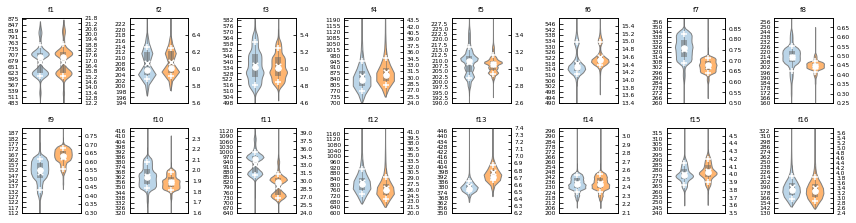

In [143]:
fig, ((ax_f1, ax_f2, ax_f3, ax_f4, ax_f5, ax_f6, ax_f7, ax_f8), (ax_f9, ax_f10, ax_f11, ax_f12, ax_f13, ax_f14, ax_f15, ax_f16)) = plt.subplots(nrows=2, ncols=8, figsize=(12, 3.2))
duration_y_lim = {
    "f1": (483, 880, 28),
    "f2": (194, 224, 2),
    "f3": (498, 584, 6),
    "f4": (700, 1200, 35),
    "f5": (190, 230, 2.5),
    "f6": (490, 550, 4),
    "f7": (260, 360, 6),
    "f8": (160, 260, 6),
    "f9": (112, 192, 5),
    "f10": (320, 420, 6),
    "f11": (640, 1140, 30),
    "f12": (600, 1200, 40),
    "f13": (350, 450, 6),
    "f14": (200, 300, 6),
    "f15": (240, 320, 5),
    "f16": (130, 330, 12)

}

cost_y_lim = {
    "f1": (12.2, 21.8, 0.6),
    "f2": (5.6, 6.6, 0.2),
    "f3": (4.6, 5.6, 0.2),
    "f4": (24, 44, 1.5),
    "f5": (2.6, 3.6, 0.2),
    "f6": (13.4, 15.6, 0.2),
    "f7": (0.5, 0.9, 0.05),
    "f8": (0.25, 0.7, 0.05),
    "f9": (0.3, 0.8, 0.05),
    "f10": (1.6, 2.4, 0.1),
    "f11": (24, 40, 1.5),
    "f12": (20, 42, 1.5),
    "f13": (6.2, 7.4, 0.1),
    "f14": (2.1, 3.1, 0.1),
    "f15": (3.5, 4.6, 0.1),
    "f16": (2.4, 5.8, 0.2)
}


for i in range(1, 17):
    string = f"""
# plot f{i}
vp{i} = ax_f{i}.violinplot(f{i}_duration, [1.5], widths=1.5,
                   showmeans=False, showmedians=False, showextrema=False)
percentile10, quartile25, medians, quartile75, percentile90 = np.percentile(f{i}_duration, [10, 25, 50, 75, 90])
mean = np.mean(f{i}_duration)
duration_y1, duration_y2, duration_step = duration_y_lim["f{i}"]
whiskers_min, whiskers_max = adjacent_values(np.sort(f{i}_duration), quartile25, quartile75)
ax_f{i}.scatter([1.5], medians, marker='o', color='white', s=30, zorder=3)
ax_f{i}.scatter([1.5], mean, marker='x', color='white', s=30, zorder=3)
ax_f{i}.scatter([1.5], percentile10, marker='+', color='white', s=30, zorder=3)
ax_f{i}.scatter([1.5], percentile90, marker='+', color='white', s=30, zorder=3)
ax_f{i}.vlines([1.5], quartile25, quartile75, color='#666666', linestyle='-', lw=6, alpha=0.5)
ax_f{i}.vlines([1.5], whiskers_min, whiskers_max, color='#666666', linestyle='-', lw=1, alpha=0.5)
ax_f{i}.set(xlim=(0, 5), xticks=np.arange(0, 5),
       ylim=(duration_y1, duration_y2), yticks=np.arange(duration_y1, duration_y2, duration_step))
ax_f{i}.set_title('f{i}', fontsize=7)
ax_f{i}_cost = ax_f{i}.twinx()
vp{i}_twin = ax_f{i}_cost.violinplot(
        f{i}_cost, [3.5], showmeans=False, showmedians=False,
        showextrema=False,  widths=1.5)
percentile10, quartile25, medians, quartile75, percentile90 = np.percentile(f{i}_cost, [10, 25, 50, 75, 90])
mean = np.mean(f{i}_cost)
cost_y1, cost_y2, cost_step = cost_y_lim["f{i}"]
whiskers_min, whiskers_max = adjacent_values(np.sort(f{i}_cost), quartile25, quartile75)
ax_f{i}_cost.scatter([3.5], medians, marker='o', color='white', s=30, zorder=3)
ax_f{i}_cost.scatter([3.5], mean, marker='x', color='white', s=30, zorder=3)
ax_f{i}_cost.scatter([3.5], percentile10, marker='+', color='white', s=30, zorder=3)
ax_f{i}_cost.scatter([3.5], percentile90, marker='+', color='white', s=30, zorder=3)
ax_f{i}_cost.vlines([3.5], quartile25, quartile75, color='#666666', linestyle='-', lw=6, alpha=0.5)
ax_f{i}_cost.vlines([3.5], whiskers_min, whiskers_max, color='#666666', linestyle='-', lw=1, alpha=0.5)
ax_f{i}_cost.set(xlim=(0, 5), xticks=np.arange(0, 5),
       ylim=(cost_y1, cost_y2), yticks=np.arange(cost_y1, cost_y2, cost_step))
for pc in vp{i}["bodies"]:
    pc.set_facecolor('#BBD5E8')
    pc.set_edgecolor('grey')
    pc.set_alpha(1)
for pc in vp{i}_twin['bodies']:
    pc.set_facecolor('#FFB570')
    pc.set_edgecolor('grey')
    pc.set_alpha(1)
ax_f{i}.tick_params(axis='both', which='major', labelsize=6)
ax_f{i}_cost.tick_params(axis='both', which='major', labelsize=6)
ax_f{i}.set_xticklabels([])
ax_f{i}_cost.set_xticklabels([])
ax_f{i}.tick_params(direction='in', bottom=False)
ax_f{i}_cost.tick_params(direction='in', bottom=False)
    """
    exec(string)




# ax_f1.set_ylabel('Duration in milliseconds')
# ax_f16_cost.set_ylabel('Cost per 1M invocations in USD')


plt.tight_layout()
plt.show()
fig.savefig("16_function_pp.pdf")